In [1]:
# !pip install opencv-python

In [2]:
import numpy as np
import os

In [3]:
print(os.getcwd())

C:\Users\hi\hi-AI\DeepLearning


In [4]:
os.chdir(os.getcwd()+"/img-animal")

In [5]:
os.getcwd()

'C:\\Users\\hi\\hi-AI\\DeepLearning\\img-animal'

In [6]:
data_dir=os.getcwd()

In [7]:
# 이미지 파일 리스트 4000개를 읽어와서, 각각의 이미지 파일마다 타겟 설정

In [8]:
import glob

In [9]:
data_list=glob.glob('*.jpg')

In [10]:
data_list[:5]

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']

In [11]:
len(data_list)

4000

In [12]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

C:\ProgramData\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.11) or chardet (4.0.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [13]:
# string을 특정한 기준에 의해 token으로 끊어 리스트를 리턴
token=text_to_word_sequence(data_list[0])

In [14]:
token

['cat', '0', 'jpg']

In [15]:
token[0]

'cat'

In [16]:
label=[]
for x in data_list:
    label.append(text_to_word_sequence(x)[0])

In [17]:
label[:5]

['cat', 'cat', 'cat', 'cat', 'cat']

In [18]:
len(label)

4000

In [19]:
# 라벨 인코더 - 카테고리형 문자를 숫자로 자동 변환해주는 역할
from sklearn.preprocessing import LabelEncoder

In [20]:
encoder=LabelEncoder()

In [21]:
label_encode=encoder.fit_transform(label)

In [22]:
encoder.classes_ # 인코딩된 분류 이름들

array(['cat', 'dog'], dtype='<U3')

In [23]:
label_encode[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [24]:
import cv2
import matplotlib.pyplot as plt


Bad key text.latex.preview in file C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

In [25]:
img=cv2.imread(data_list[0])

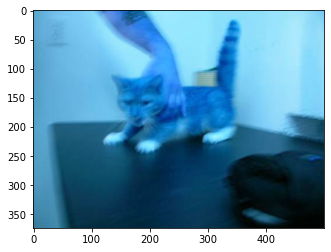

In [26]:
plt.imshow(img)

In [27]:
img.shape # 사진이 컬러인 경우 => 3, 흑백인 경우 => 1

(374, 500, 3)

In [28]:
img2=cv2.imread(data_list[1])

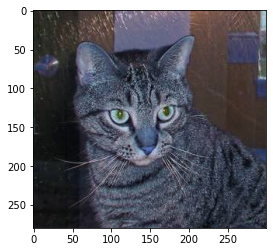

In [29]:
plt.imshow(img2)

In [30]:
img2.shape

(280, 300, 3)

In [31]:
# 표준화

In [32]:
img=img/255

In [33]:
img[0][0]

array([0.34117647, 0.64313725, 0.79607843])

In [34]:
# 크기를 동일하게 맞추어 변경해주자

In [35]:
data_height=150
data_width=150
channel_n=3 # 컬러 색상으로 설정

In [36]:
img_resize=cv2.resize(img, (data_height, data_width))

In [37]:
img_resize.shape

(150, 150, 3)

In [38]:
# 사진 4000개의 크기를 모두 변경

In [39]:
data_list[0]

'cat.0.jpg'

In [40]:
cv2.imread(data_list[0])

array([[[ 87, 164, 203],
        [ 87, 164, 203],
        [ 88, 165, 204],
        ...,
        [122, 201, 240],
        [121, 200, 239],
        [120, 199, 238]],

       [[ 87, 164, 203],
        [ 87, 164, 203],
        [ 88, 165, 204],
        ...,
        [123, 202, 241],
        [122, 201, 240],
        [120, 199, 238]],

       [[ 87, 164, 203],
        [ 87, 164, 203],
        [ 88, 165, 204],
        ...,
        [123, 202, 241],
        [122, 201, 240],
        [121, 200, 239]],

       ...,

       [[ 55, 122, 153],
        [ 55, 122, 153],
        [ 55, 122, 153],
        ...,
        [  0,   2,   2],
        [  0,   2,   2],
        [  0,   2,   2]],

       [[ 54, 121, 152],
        [ 54, 121, 152],
        [ 54, 121, 152],
        ...,
        [  0,   2,   2],
        [  0,   2,   2],
        [  0,   2,   2]],

       [[ 53, 120, 151],
        [ 53, 120, 151],
        [ 53, 120, 151],
        ...,
        [  0,   1,   1],
        [  0,   1,   1],
        [  0,   1,   1]]

In [41]:
resize_list=[]
for x in data_list:
    one=cv2.imread(x)/255
    resize=cv2.resize(one, (data_height, data_width))
    resize_list.append(resize)

In [42]:
len(resize_list), resize_list[0].shape

(4000, (150, 150, 3))

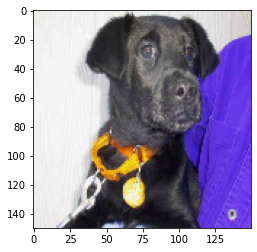

In [43]:
plt.imshow(resize_list[3333])

In [44]:
# CNN 특성 추출을 하려면 이미지가 4차원이 되어야 함
# (4000, 150, 150, 3)
# 4000: 이미지의 개수
# 150, 150,: 가로 세로 픽셀
# 3: 컬러
# 0으로 채워지는 4차원 배열을 하나 만들고
# 각각의 이미지를 스케일링하고 리사이징해서 4차원 배열에 넣는다

In [45]:
total_images=np.zeros((5, data_height, data_width, channel_n))

In [46]:
total_images[0][0][0][0]

0.0

In [47]:
# 읽어온 이미지 목록을 넣으면 라벨링, 스케일링, 리사이징하는 함수 선언
def make_file(data_height, data_width, channel_n, data_list_len): # 높이, 너비, 컬러, 리스트 길이
    # 라벨링한 결과를 넣을 1차원 리스트
    label=[]
    # 4차원으로 만들기 위한 4차원 리스트 필요
    images=np.zeros((data_list_len, data_height, data_width, channel_n))
    # 이미지 리스트에서 하나씩 꺼내서 라벨링, 스케일링, 리사이징
    for i, image in enumerate(data_list):
        # 라벨링 : dog.01.jpg
        tokens=text_to_word_sequence(image)
        label.append(tokens[0])
        
        # 읽어서 스케일링, 리사이징 
        image=cv2.imread(image) #읽기
        image=cv2.resize(image, (data_height, data_width)) /255 #리사이징, 스케일링
        # 4차원 리스트에 하나씩 append
        images[i, :, :, :]=image
    label2=np.array(label)
    return label2, images

In [48]:
labels, images=make_file(data_height, data_width, channel_n, 4000)

In [49]:
labels

array(['cat', 'cat', 'cat', ..., 'dog', 'dog', 'dog'], dtype='<U3')

In [50]:
labels.shape

(4000,)

In [51]:
items = labels
encoder = LabelEncoder()
label = encoder.fit_transform(items)
label, len(label) 

(array([0, 0, 0, ..., 1, 1, 1], dtype=int64), 4000)

In [52]:
encoder.classes_

array(['cat', 'dog'], dtype='<U3')

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(images, label, test_size= 0.2, random_state=55)

In [55]:
print(X_train.shape, X_test.shape)

(3200, 150, 150, 3) (800, 150, 150, 3)


In [56]:
# 딥러닝 모델 만들기
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [57]:
model=Sequential()
# 특성 추출 레이어를 쌓아준다.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(data_height, data_width, 3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2,2)))

# 딥러닝 학습 레이어를 쌓아준다.
# 입력 -- 은닉 -- 출력 순서대로 쌓아준다.

# 입력층(1개) => 1차원이어야함
model.add(Flatten()) # 이미지 데이터를 1차원으로 만들어주는 객체

# 은닉층
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5)) 
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation='relu'))
model.add(Dropout(rate=0.5))

# 출력층(1개) => 딥러닝하는 학습의 종류에 따라 다르게 써주어야 함
# 이진 분류인 경우(1, sigmoid)
# 다중 분류인 경우(n, softmax)
# 회귀인 경우(1, linear)
model.add(Dense(1, activation='sigmoid')) #결과가 엘리먼트로 출력됨. 0.5를 기준으로 판별

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 64)                5

In [59]:
# 모델의 설정값 지정: 
# 1. 기울기를 찾기 위한 최적의 방법 설정(옵티마이저)
# 2. 특정 가중치를 가지는 경우의 오차를 계산하는 방법 설정(loss)
#    회귀인 경우: mae
#    분류인 경우: 이진(binary_crossentropy)
#                 다중(categorical_crossentropy, 타겟 항목을 인코딩하지 않은 경우 => sparse_categorical_crossentropy)
# 3. 학습 과정에서 어떤 항목의 수치를 출력시키고 싶은지(metrics)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
# 공부를 시키자
# validation_data => epoch마다 train 데이터의 loss, acc뿐만 아니라 test 데이터의 loss, acc를 알고자 하는 경우 사용, 연산량 많아짐
# verbose => 출력의 상세한 정도. 2가 가장 자세함
# 조기종료(earlyStopping) => epoch를 실행할 때 최적의 acc인 경우, 더 이상 epoch를 수행하지 않아도 된다.
# 모델저장(checkpoint) => 최적의 acc인 경우의 가중치를 자동으로 모델파일로 저장하게 설정 (현재는 img-animal 폴더에 저장됨)
# 특정한 상황을 기다렸다가 특정한 처리를 하고자 하는 경우(콜백)
# 객체를 만들어주고, fit(callbacks=[객체])
es=EarlyStopping(patience=3, restore_best_weights=True)
cp=ModelCheckpoint('best_cnn.h5')
cnn_history=model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test),
                      callbacks=[es, cp], verbose=2)


Epoch 1/10
25/25 - 29s - loss: 0.6926 - accuracy: 0.5125 - val_loss: 0.6877 - val_accuracy: 0.5038 - 29s/epoch - 1s/step
Epoch 2/10
25/25 - 30s - loss: 0.6913 - accuracy: 0.5184 - val_loss: 0.6901 - val_accuracy: 0.4988 - 30s/epoch - 1s/step
Epoch 3/10
25/25 - 31s - loss: 0.6888 - accuracy: 0.5381 - val_loss: 0.6910 - val_accuracy: 0.5400 - 31s/epoch - 1s/step
Epoch 4/10
25/25 - 29s - loss: 0.6879 - accuracy: 0.5525 - val_loss: 0.6861 - val_accuracy: 0.5487 - 29s/epoch - 1s/step
Epoch 5/10
25/25 - 29s - loss: 0.6917 - accuracy: 0.5491 - val_loss: 0.6827 - val_accuracy: 0.5512 - 29s/epoch - 1s/step
Epoch 6/10
25/25 - 28s - loss: 0.6834 - accuracy: 0.5353 - val_loss: 0.6706 - val_accuracy: 0.5850 - 28s/epoch - 1s/step
Epoch 7/10
25/25 - 29s - loss: 0.6763 - accuracy: 0.5728 - val_loss: 0.6836 - val_accuracy: 0.5350 - 29s/epoch - 1s/step
Epoch 8/10
25/25 - 28s - loss: 0.6825 - accuracy: 0.5356 - val_loss: 0.6497 - val_accuracy: 0.6488 - 28s/epoch - 1s/step
Epoch 9/10
25/25 - 28s - loss: 0

In [69]:
cnn_history2=model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test),
                      callbacks=[es, cp], verbose=2) # 조기종료됨

Epoch 1/10
25/25 - 29s - loss: 0.6496 - accuracy: 0.6181 - val_loss: 0.6320 - val_accuracy: 0.6913 - 29s/epoch - 1s/step
Epoch 2/10
25/25 - 29s - loss: 0.6320 - accuracy: 0.6506 - val_loss: 0.6224 - val_accuracy: 0.6787 - 29s/epoch - 1s/step
Epoch 3/10
25/25 - 28s - loss: 0.6167 - accuracy: 0.6700 - val_loss: 0.6003 - val_accuracy: 0.6950 - 28s/epoch - 1s/step
Epoch 4/10
25/25 - 29s - loss: 0.6032 - accuracy: 0.6816 - val_loss: 0.6183 - val_accuracy: 0.6400 - 29s/epoch - 1s/step
Epoch 5/10
25/25 - 29s - loss: 0.6027 - accuracy: 0.6928 - val_loss: 0.6385 - val_accuracy: 0.6363 - 29s/epoch - 1s/step
Epoch 6/10
25/25 - 28s - loss: 0.5679 - accuracy: 0.7159 - val_loss: 0.6209 - val_accuracy: 0.6750 - 28s/epoch - 1s/step


In [66]:
test_result=model.evaluate(X_test, y_test)

25/25 [==============================] - 2s 85ms/step - loss: 0.6366 - accuracy: 0.6737


In [67]:
test_result

[0.6365587711334229, 0.6737499833106995]

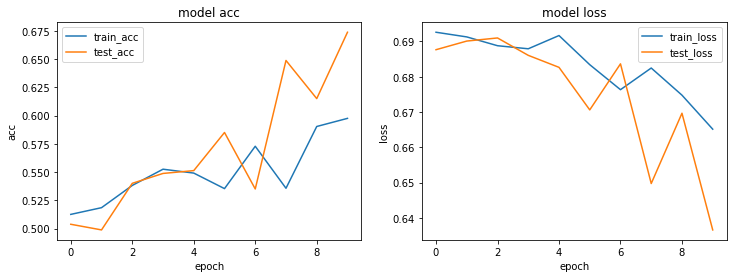

In [68]:
# cnn_history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1) # 1행 2열의 도표, 1열
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('model acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train_acc', 'test_acc'])
plt.subplot(1, 2, 2) # 1행 2열의 도표, 2열
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'test_loss'])

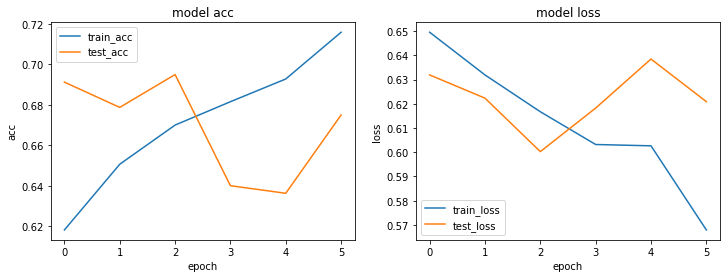

In [70]:
# cnn_history2
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1) # 1행 2열의 도표, 1열
plt.plot(cnn_history2.history['accuracy'])
plt.plot(cnn_history2.history['val_accuracy'])
plt.title('model acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train_acc', 'test_acc'])
plt.subplot(1, 2, 2) # 1행 2열의 도표, 2열
plt.plot(cnn_history2.history['loss'])
plt.plot(cnn_history2.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'test_loss'])

In [71]:
# 새로운 모델

In [72]:
model2=Sequential()
# 특성 추출 레이어를 쌓아준다.
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(data_height, data_width, 3)))
model2.add(MaxPool2D((2,2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPool2D((2,2)))

# 딥러닝 학습 레이어를 쌓아준다.
# 입력 -- 은닉 -- 출력 순서대로 쌓아준다.

# 입력층(1개) => 1차원이어야함
model2.add(Flatten()) # 이미지 데이터를 1차원으로 만들어주는 객체

# 은닉층
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(rate=0.7)) 
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(rate=0.7))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(rate=0.5))
model2.add(Dense(5, activation='relu'))
model2.add(Dropout(rate=0.5))

# 출력층(1개) => 딥러닝하는 학습의 종류에 따라 다르게 써주어야 함
# 이진 분류인 경우(1, sigmoid)
# 다중 분류인 경우(n, softmax)
# 회귀인 경우(1, linear)
model2.add(Dense(1, activation='sigmoid')) #결과가 엘리먼트로 출력됨. 0.5를 기준으로 판별

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [73]:
es2=EarlyStopping(patience=2, restore_best_weights=True)
cp2=ModelCheckpoint('best_cnn2.h5')
cnn_history3=model2.fit(X_train, y_train, batch_size=256, epochs=10, validation_data=(X_test, y_test),
                      callbacks=[es2, cp2], verbose=2)

Epoch 1/10
13/13 - 30s - loss: 0.8209 - accuracy: 0.5003 - val_loss: 0.6931 - val_accuracy: 0.5038 - 30s/epoch - 2s/step
Epoch 2/10
13/13 - 29s - loss: 0.6934 - accuracy: 0.4991 - val_loss: 0.6931 - val_accuracy: 0.5038 - 29s/epoch - 2s/step
Epoch 3/10
13/13 - 29s - loss: 0.6934 - accuracy: 0.5050 - val_loss: 0.6931 - val_accuracy: 0.5038 - 29s/epoch - 2s/step
Epoch 4/10
13/13 - 28s - loss: 0.6933 - accuracy: 0.4959 - val_loss: 0.6931 - val_accuracy: 0.5038 - 28s/epoch - 2s/step
Epoch 5/10
13/13 - 29s - loss: 0.6932 - accuracy: 0.4988 - val_loss: 0.6931 - val_accuracy: 0.5038 - 29s/epoch - 2s/step


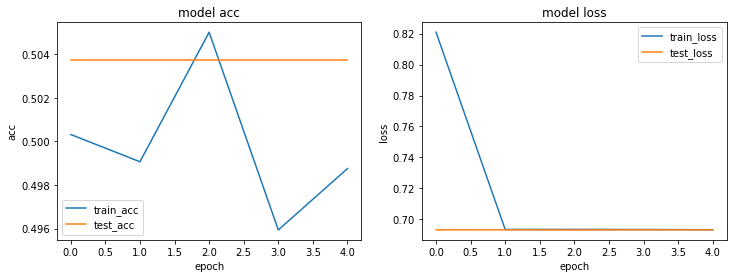

In [74]:
# cnn_history3
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1) # 1행 2열의 도표, 1열
plt.plot(cnn_history3.history['accuracy'])
plt.plot(cnn_history3.history['val_accuracy'])
plt.title('model acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train_acc', 'test_acc'])
plt.subplot(1, 2, 2) # 1행 2열의 도표, 2열
plt.plot(cnn_history3.history['loss'])
plt.plot(cnn_history3.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'test_loss'])